# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Nusrat Jahan

In this Jupyter notebook, we will be building a real-life data science project . Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of coronavirus inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127.6 MB 18 kB/s 
     |████████████████████████████████| 10.1 MB 26.5 MB/s 
     |████████████████████████████████| 248 kB 48.2 MB/s 
     |████████████████████████████████| 25.9 MB 21.2 MB/s 
     |████████████████████████████████| 1.2 MB 47.3 MB/s 
     |████████████████████████████████| 14.5 MB 19.1 MB/s 
     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 302 kB 51.2 MB/s 
     |████████████████████████████████| 6.8 MB 15.1 MB/s 
     |████████████████████████████████| 269 kB 60.8 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=552881d845dc2f3d87f00e29287450d17ec83d730d6573966c82fc083d7755fe
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: nu

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **2. Load the data set**


In [3]:
#! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
#! wget https://github.com/Jahan08/Data-Science-Portfolio/blob/main/coronavirus_bioactivity_data_pIC50_pubchem_fp.csv

--2022-08-13 15:14:31--  https://github.com/Jahan08/Data-Science-Portfolio/blob/main/coronavirus_bioactivity_data_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘coronavirus_bioactivity_data_pIC50_pubchem_fp.csv’

coronavirus_bioacti     [  <=>               ]   2.69M  9.58MB/s    in 0.3s    

2022-08-13 15:14:32 (9.58 MB/s) - ‘coronavirus_bioactivity_data_pIC50_pubchem_fp.csv’ saved [2816472]



In [5]:
df = pd.read_csv('/content/coronavirus_bioactivity_data_pIC50_pubchem_fp.csv')

In [6]:
#Spliting the data into X and Y variables
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(119, 881)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(119, 197)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [10]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 207004.43it/s]


In [11]:
# Performance table of the training set (80% subset)
predictions_train

Adjusted R-Squared  \
Model                                                                              
Lars                          16454427076748265573747763111609620150988175601...   
KernelRidge                                                                 5.90   
LassoLarsIC                                                                 1.91   
DummyRegressor                                                              1.91   
LassoLars                                                                   1.91   
Lasso                                                                       1.81   
ElasticNet                                                                  1.59   
LassoLarsCV                                                                 1.54   
LassoCV                                                                     1.53   
ElasticNetCV                                                                1.52   
LarsCV                                                                      1.52   
PassiveAggressiveRegressor                                                  1.52   
OrthogonalMatchingPursuitCV                                                 1.49   
LinearSVR                                                                   1.47   
SVR                                                                         1.47   
HuberRegressor                                                              1.41   
BayesianRidge                                                               1.40   
NuSVR                                                                       1.40   
KNeighborsRegressor                                                         1.39   
AdaBoostRegressor                                                           1.38   
GammaRegressor                                                              1.37   
TweedieRegressor                                                            1.37   
GeneralizedLinearRegressor                                                  1.37   
SGDRegressor                                                                1.36   
PoissonRegressor                                                            1.35   
BaggingRegressor                                                            1.35   
HistGradientBoostingRegressor                                               1.34   
LGBMRegressor                                                               1.34   
OrthogonalMatchingPursuit                                                   1.33   
RidgeCV                                                                     1.32   
RandomForestRegressor                                                       1.31   
MLPRegressor                                                                1.29   
Ridge                                                                       1.29   
GradientBoostingRegressor                                                   1.29   
LinearRegression                                                            1.29   
TransformedTargetRegressor                                                  1.29   
XGBRegressor                                                                1.29   
GaussianProcessRegressor                                                    1.29   
ExtraTreesRegressor                                                         1.29   
DecisionTreeRegressor                                                       1.29   
ExtraTreeRegressor                                                          1.29   

                                                                       R-Squared  \
Model                                                                              
Lars                          -1802985094579863170371531573289292389207716716...   
KernelRidge                                                                -4.37   
LassoLarsIC                                                                 0.00   
DummyRegressor               

In [13]:
# Performance table of the test set (20% subset)
predictions_test

Empty DataFrame
Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
Index: []

## **5. Data visualization of model performance**

In [14]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

[(0.0, 10.0)]

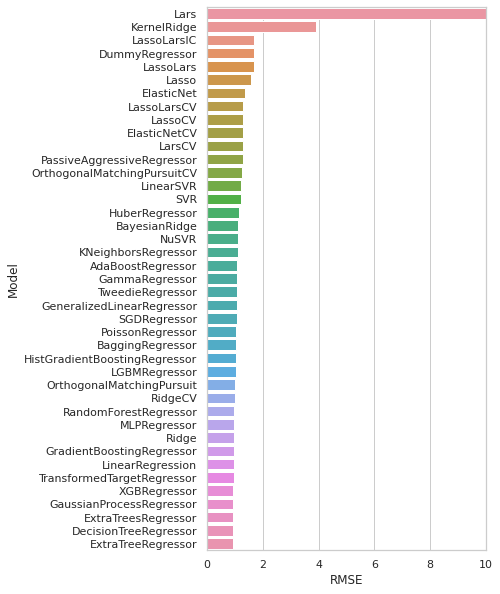

In [15]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

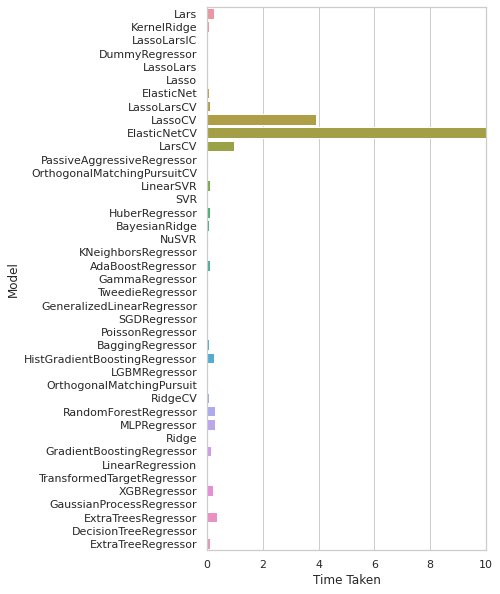

In [16]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))